<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_003_study_essential/_002_boston/_001_boston_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict price of boston housing

# 들어가기 전

## Comma: [  **,**  ]

- 구분자

ex) 예를 들어,

    문장에서의 콤마는 `쉼표` 또는 `구두점`

**# Ex) 1,2,3,4,5**

    `요소 나열의 구분`



---


## Dot: [ **.** ]

- 접근 제어자


ex) 오늘도 공부하는 나는 발전하는 것이다.

    문장에서의 점은 `쉼표` 또는 `구두점`


    
**# Ex) tensorflow.keras**
    
    `접근 제어자`로 
    1. tensorflow 안에 존재하는
    2. keras 모듈에 `접근`할 때 사용하는 `키워드`


# 데이터 로드

In [ ]:
from tensorflow.keras.datasets import boston_housing
import numpy as np

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

케라스에서 제공하는 `datasets` 내에 있는 `boston_housing()` 데이터를 사용한다.

## 데이터 시각화를 위한 데이터 병합

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

shape 맞는 것끼리 합친다.

- **X**_train + **X**_test

- **y**_train + **y**_test

x는 x끼리
y는 y끼리



### ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [ ]:
# ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

- CRIM: 인구 1인당 범죄 발생 수
- ZN: 25,000평방 비트 이상의 주거 구역 비중
- INDUS: 소매업 외 상업이 차지하는 면적 비율
- CHAS: 찰스강 위치 변수 (1: 강 주변, 0: 이외)
- NOX: 일산화질소 농도
- RM: 집의 평균 방 수
- AGE: `1940년 이전`에 지어진 비율 (노후 건물)
- DIS: 5가지 보스턴 시 `고용 시설까지`의 거리 (평택 삼성, 이천 하이닉스 이런 직장 느낌)
- RAD: `순환 고속도로`의 접근성 (교통 편의)
- TAX: $10,000당 `부동산 세율` 총계
- PTRATIO: 지역별 `학생과 교사` 비율
- B: 지역별 `흑인` 비율
- LSTAT: `급여가 낮은` 직업에 종사하는 `인구 비율`


## import libaray for merge

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import load_boston

data = load_boston()

In [ ]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
data.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [ ]:
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

### create DataFrame

In [ ]:
df = pd.DataFrame(X, columns=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat'])
df['price'] = y
df.head()
del X
del y

### Verification

y_train 네 번째 가격은 DataFrame 네 번째 가격과 `동일`하다

In [ ]:
y_train[3] == df.loc[3, ['price']]

price    True
Name: 3, dtype: bool

404 + 102 row == 506

13 + 1 (price) col == 14

In [ ]:
(506, 14) == df.shape

True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [ ]:
df.groupby(['price'])

In [ ]:
df.groupby(['crim', 'indus', 'tax', 'lstat', 'price'])['price', 'tax'].min().style.background_gradient(cmap='Purples')

,,,,,price,tax
crim,indus,tax,lstat,price,,
0.00632,2.31,296.0,4.98,24.0,24.000000,296.000000
0.00906,2.97,285.0,7.85,32.2,32.200000,285.000000
0.01096,2.25,300.0,8.23,22.0,22.000000,300.000000
0.01301,1.52,284.0,5.49,32.7,32.700000,284.000000
0.01311,1.22,226.0,4.81,35.4,35.400000,226.000000
0.0136,4.0,469.0,14.8,18.9,18.900000,469.000000
0.01381,0.46,255.0,2.97,50.0,50.000000,255.000000
0.01432,1.32,256.0,3.95,31.6,31.600000,256.000000
0.01439,2.93,265.0,4.38,29.1,29.100000,265.000000


# 데이터 `시각화`

## import library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## sns.lmplot

In [ ]:
df.sample(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
467,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.9,12.92,21.2


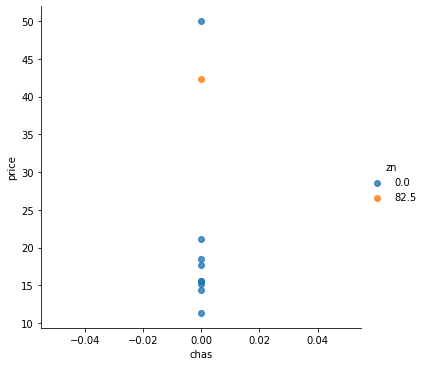

In [ ]:
sns.lmplot('chas', 'price', hue='zn', data=df.head(10))

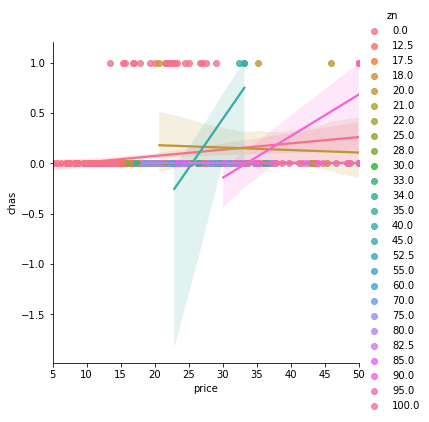

In [ ]:
sns.lmplot('price', 'chas', data=df, hue='zn')

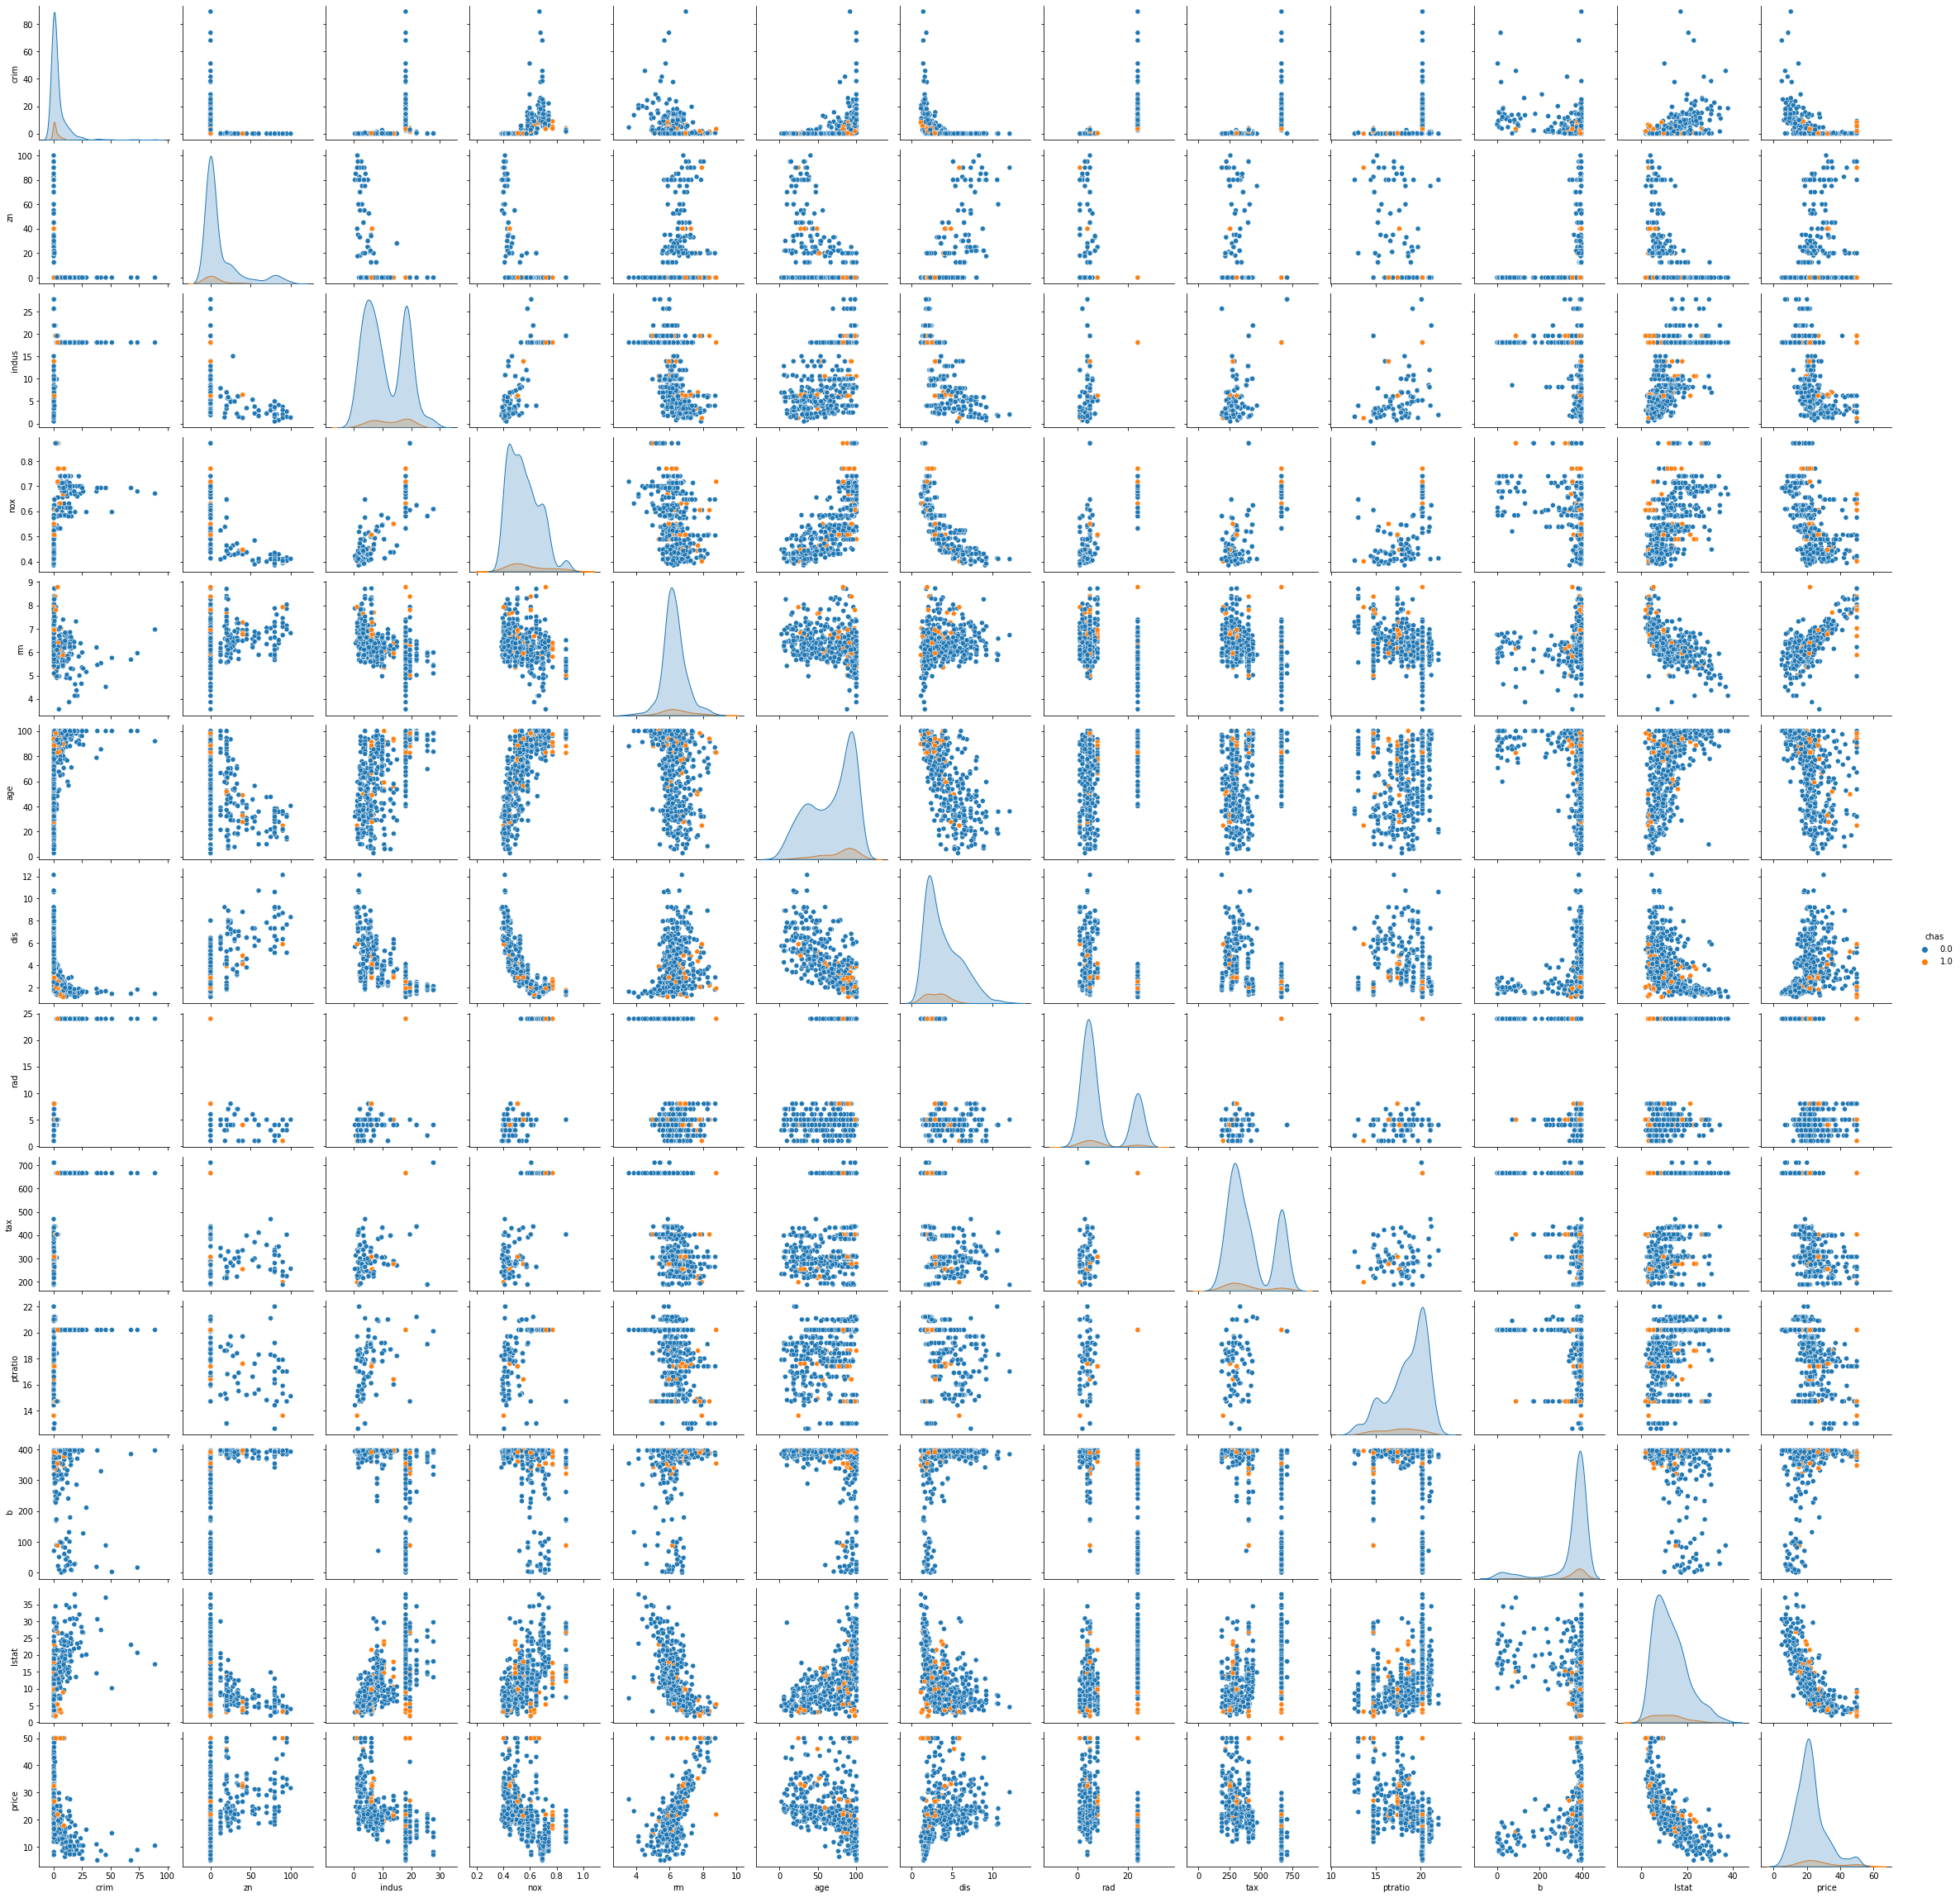

In [ ]:
# fig, ax = plt.subplots(figsize=(12, 7))

sns.pairplot(data=df, hue='chas')

# 사용할 `machine` import

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
stopping_callback = EarlyStopping(patience=30)

In [ ]:
model = models.Sequential([
                           layers.Input(shape=(13)),
                           layers.Dense(units=64),
                          #  layers.BatchNormalization(),
                           layers.Activation(activation='relu'),
                           layers.Dense(units=8),
                           layers.BatchNormalization(),
                           layers.Activation(activation='relu'),
                           
                           layers.Dense(units=1)
])

model.compile(loss='mse',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    validation_split=.2,
                    epochs=700)

Epoch 1/700
3/3 [==============================] - 1s 77ms/step - loss: 569.3665 - accuracy: 0.0000e+00 - val_loss: 1747.7557 - val_accuracy: 0.0000e+00
Epoch 2/700
3/3 [==============================] - 0s 17ms/step - loss: 581.3125 - accuracy: 0.0000e+00 - val_loss: 1377.3962 - val_accuracy: 0.0000e+00
Epoch 3/700
3/3 [==============================] - 0s 16ms/step - loss: 564.4533 - accuracy: 0.0000e+00 - val_loss: 1184.0977 - val_accuracy: 0.0000e+00
Epoch 4/700
3/3 [==============================] - 0s 16ms/step - loss: 561.1658 - accuracy: 0.0000e+00 - val_loss: 1089.8945 - val_accuracy: 0.0000e+00
Epoch 5/700
3/3 [==============================] - 0s 15ms/step - loss: 563.6930 - accuracy: 0.0000e+00 - val_loss: 1021.0168 - val_accuracy: 0.0000e+00
Epoch 6/700
3/3 [==============================] - 0s 16ms/step - loss: 572.2782 - accuracy: 0.0000e+00 - val_loss: 970.4154 - val_accuracy: 0.0000e+00
Epoch 7/700
3/3 [==============================] - 0s 17ms/step - loss: 561.9904 - 